#### **Import Libraries and Packages**

In [80]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder


from sklearn import set_config
set_config(display="diagram")

#### **Import and Explore Dataset**

In [81]:
# import dataset
house_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing_prices.csv', index_col='Id')
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [82]:
# inspect dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [83]:
# Drop relatively empty columns
house_data = house_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [84]:
# inspect dataframe again
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [85]:
# reassign target.
y = house_data.pop('SalePrice')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [86]:
# summarize features
print(house_data.columns)
print('\n')
print('Total number of columns:', len(house_data.columns))

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

#### **Prepare the data categories into numerical and categorical data**

    Done after inspecting the description of all the features.

In [87]:
# numerical features
X_num = house_data.select_dtypes(include='number')
X_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [88]:
# inspect numerical data
print(X_num.columns)
print('\n')
print('Total number of columns:', len(X_num.columns))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


Total number of columns: 36


In [89]:
# categorical features
X_cat = house_data.select_dtypes(include='object')
X_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [90]:
# inspect categorical data
print(X_cat.columns)
print('\n')
print('Total number of columns:', len(X_cat.columns))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


Total number of columns: 38


In [91]:
# Remove certain features from the numerical features. 
# Add them to the categorical data with their data type changed.

X_cat.loc[:,'MSSubClass'] = X_num.pop('MSSubClass')
X_cat.loc[:,'MSSubClass'] = X_cat.loc[:,'MSSubClass'].astype(str)

X_cat.loc[:,'MoSold'] = X_num.pop('MoSold')
X_cat.loc[:,'MoSold'] = X_cat.loc[:,'MoSold'].astype(str)

X_cat.loc[:,'OverallQual'] = X_num.pop('OverallQual')
X_cat.loc[:,'OverallQual'] = X_cat.loc[:,'OverallQual'].astype(str)

X_cat.loc[:,'OverallCond'] = X_num.pop('OverallCond')
X_cat.loc[:,'OverallCond'] = X_cat.loc[:,'OverallCond'].astype(str)

print(X_num.columns)
print('\n')
print(X_cat.columns)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold'],
      dtype='object')


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


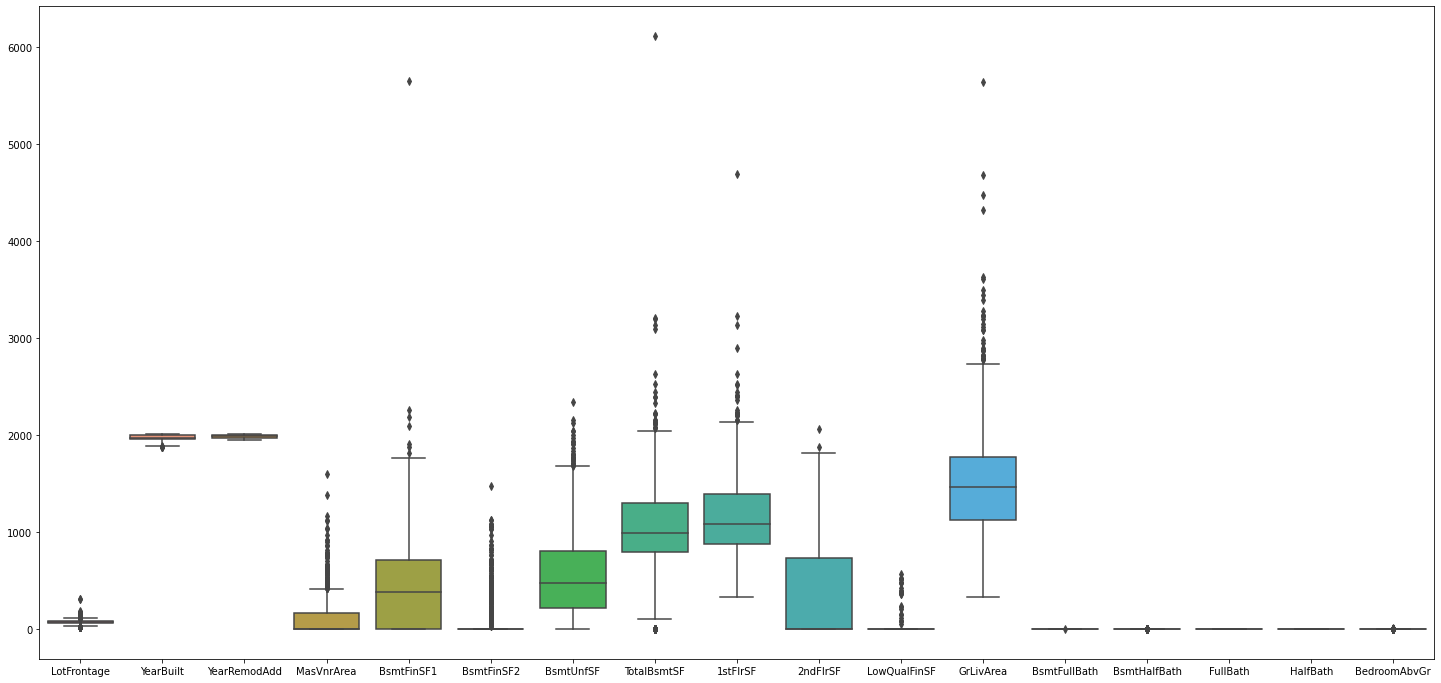

In [92]:
# Visualize numerical features
plt.figure(figsize=(25,12))
sns.boxplot(data=X_num.iloc[:, [0] + list(range(2, 18))])
plt.show();

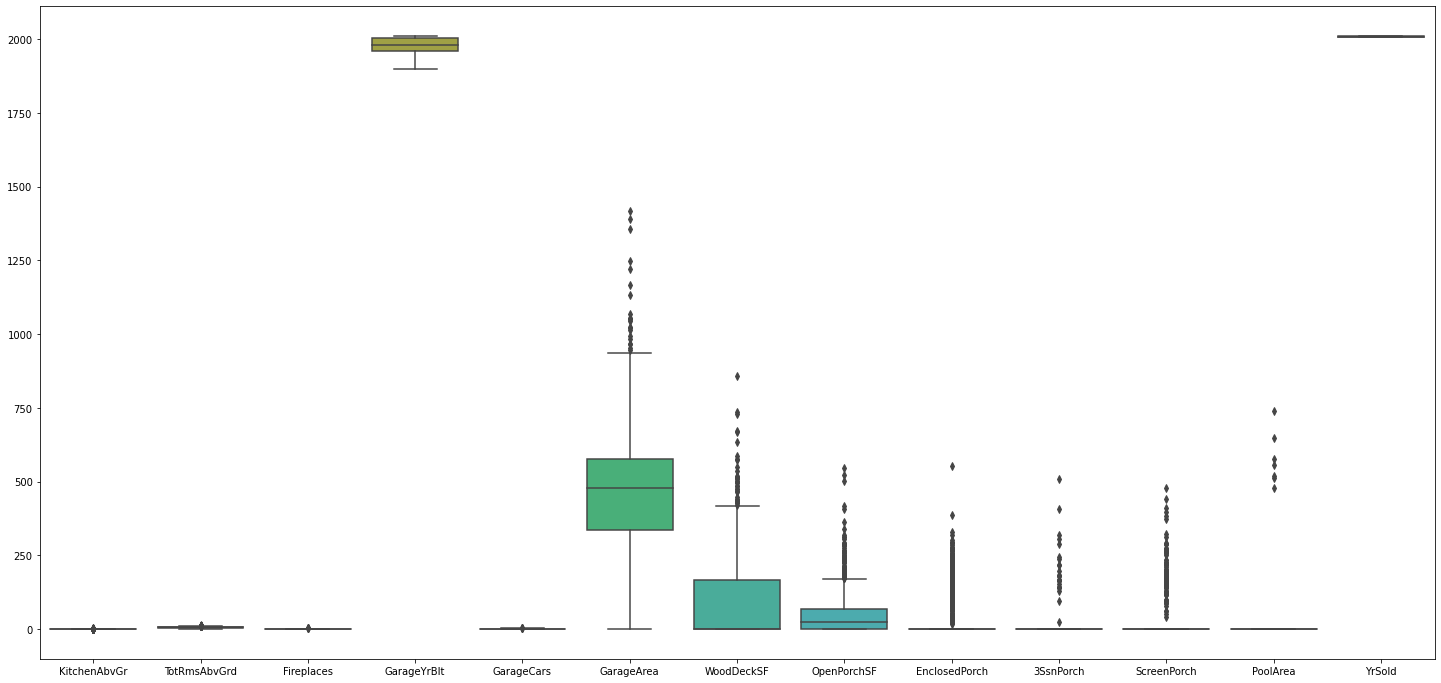

In [93]:
# Visualize numerical features
plt.figure(figsize=(25,12))
sns.boxplot(data=X_num.iloc[:, list(range(18, 30)) + [31]])
plt.show();

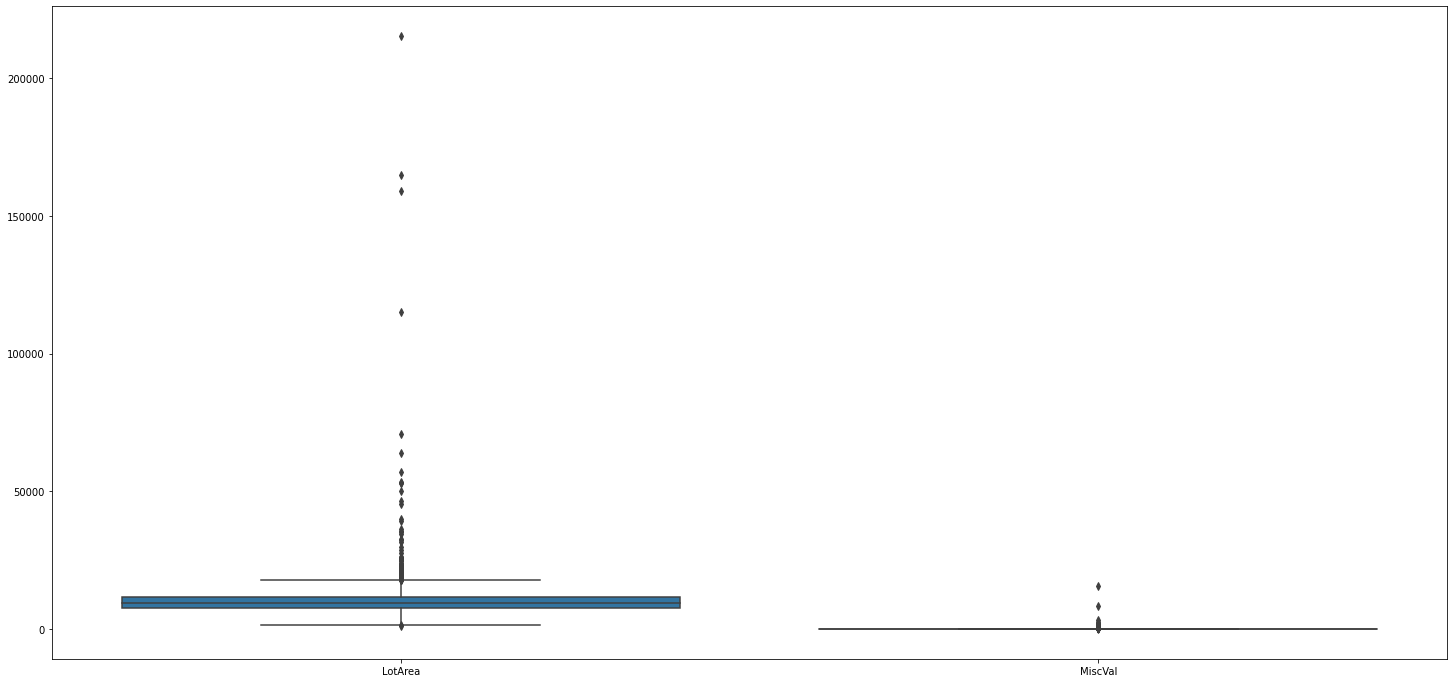

In [94]:
# Visualize numerical features
plt.figure(figsize=(25,12))
sns.boxplot(data=X_num.iloc[:, [1, 30]])
plt.show();

    Most features contain outliers. Robust Scaler will be used to minimize the effects of outliers.

In [95]:
# rejoin the numerical and categorical features.
X = pd.concat([X_num, X_cat], axis=1)
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,MoSold,OverallQual,OverallCond
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,RFn,TA,TA,Y,WD,Normal,60,2,7,5
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,RFn,TA,TA,Y,WD,Normal,20,5,6,8
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,RFn,TA,TA,Y,WD,Normal,60,9,7,5
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,Unf,TA,TA,Y,WD,Abnorml,70,2,7,5
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,RFn,TA,TA,Y,WD,Normal,60,12,8,5


#### **Split Dataset into Train and Test Set**

In [96]:
# Split dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [97]:
# divide train dataset to numerical and categorical features.
X_num = X_train.select_dtypes(exclude='object')
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   YearBuilt      1168 non-null   int64  
 3   YearRemodAdd   1168 non-null   int64  
 4   MasVnrArea     1162 non-null   float64
 5   BsmtFinSF1     1168 non-null   int64  
 6   BsmtFinSF2     1168 non-null   int64  
 7   BsmtUnfSF      1168 non-null   int64  
 8   TotalBsmtSF    1168 non-null   int64  
 9   1stFlrSF       1168 non-null   int64  
 10  2ndFlrSF       1168 non-null   int64  
 11  LowQualFinSF   1168 non-null   int64  
 12  GrLivArea      1168 non-null   int64  
 13  BsmtFullBath   1168 non-null   int64  
 14  BsmtHalfBath   1168 non-null   int64  
 15  FullBath       1168 non-null   int64  
 16  HalfBath       1168 non-null   int64  
 17  BedroomAbvGr   1168 non-null   int64  
 18  Kitche

In [98]:
X_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold',
       'OverallQual', 'OverallCond'],
      dtype='object')

In [99]:
# Ordinal categorical data
X_cat_ord = X_train[['GarageCond', 'GarageFinish', 'GarageQual', 'Electrical', 'HeatingQC', 'BsmtFinType2', \
                     'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'ExterCond', \
                     'ExterQual', 'Functional', 'OverallQual', 'OverallCond', 'Street', 'LotShape', \
                     'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'PavedDrive']]

X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1103 non-null   object
 1   GarageFinish  1103 non-null   object
 2   GarageQual    1103 non-null   object
 3   Electrical    1168 non-null   object
 4   HeatingQC     1168 non-null   object
 5   BsmtFinType2  1139 non-null   object
 6   BsmtFinType1  1139 non-null   object
 7   BsmtExposure  1139 non-null   object
 8   KitchenQual   1168 non-null   object
 9   BsmtQual      1139 non-null   object
 10  BsmtCond      1139 non-null   object
 11  ExterCond     1168 non-null   object
 12  ExterQual     1168 non-null   object
 13  Functional    1168 non-null   object
 14  OverallQual   1168 non-null   object
 15  OverallCond   1168 non-null   object
 16  Street        1168 non-null   object
 17  LotShape      1168 non-null   object
 18  LandContour   1168 non-null   object
 19  Util

In [100]:
# nominal categorical data
X_cat_onehot = X_train.drop(X_num.columns.tolist() + X_cat_ord.columns.tolist(), axis=1)

X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Neighborhood   1168 non-null   object
 2   Condition1     1168 non-null   object
 3   Condition2     1168 non-null   object
 4   BldgType       1168 non-null   object
 5   HouseStyle     1168 non-null   object
 6   RoofStyle      1168 non-null   object
 7   RoofMatl       1168 non-null   object
 8   Exterior1st    1168 non-null   object
 9   Exterior2nd    1168 non-null   object
 10  MasVnrType     1162 non-null   object
 11  Foundation     1168 non-null   object
 12  Heating        1168 non-null   object
 13  CentralAir     1168 non-null   object
 14  GarageType     1103 non-null   object
 15  SaleType       1168 non-null   object
 16  SaleCondition  1168 non-null   object
 17  MSSubClass     1168 non-null   object
 18  MoSold         1168 non-nu

######**Some Feature Engineering**

    Since Real-Estate appreciate with age and inflation, also, because inflation makes things more expensive, extension of a house structure 
    and remodelling of a house will cause an appreciation of its value.
    The time till renovation helps tell the quality of materials used to build house.
    The year till the garage was built might also indicate the resources put into building the house and how expensive it will be.
    Therefore, the year features will best be beneficially represented by the length of the time.

In [101]:
# engineer the year features
X_num['Age_Sold'] = X_num.apply(lambda row: row['YrSold'] - row['YearBuilt'], axis=1)
X_num['Renovation'] = X_num.apply(lambda row: row['YearRemodAdd'] - row['YearBuilt'], axis=1)
X_num['Garage_Age'] = X_num.apply(lambda row: row['GarageYrBlt'] - row['YearBuilt'], axis=1)

X_num.drop(['YearBuilt', 'YrSold', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [102]:
# apply the same year feature engineering to test set.
X_test['Age_Sold'] = X_test.apply(lambda row: row['YrSold'] - row['YearBuilt'], axis=1)
X_test['Renovation'] = X_test.apply(lambda row: row['YearRemodAdd'] - row['YearBuilt'], axis=1)
X_test['Garage_Age'] = X_test.apply(lambda row: row['GarageYrBlt'] - row['YearBuilt'], axis=1)

X_test.drop(['YearBuilt', 'YrSold', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

In [103]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   MasVnrArea     1162 non-null   float64
 3   BsmtFinSF1     1168 non-null   int64  
 4   BsmtFinSF2     1168 non-null   int64  
 5   BsmtUnfSF      1168 non-null   int64  
 6   TotalBsmtSF    1168 non-null   int64  
 7   1stFlrSF       1168 non-null   int64  
 8   2ndFlrSF       1168 non-null   int64  
 9   LowQualFinSF   1168 non-null   int64  
 10  GrLivArea      1168 non-null   int64  
 11  BsmtFullBath   1168 non-null   int64  
 12  BsmtHalfBath   1168 non-null   int64  
 13  FullBath       1168 non-null   int64  
 14  HalfBath       1168 non-null   int64  
 15  BedroomAbvGr   1168 non-null   int64  
 16  KitchenAbvGr   1168 non-null   int64  
 17  TotRmsAbvGrd   1168 non-null   int64  
 18  Firepl

#### **Feature Selection**

#####**Numerical Features**

###### **Based on Variance**

In [104]:
def variance_selector(A, m):

  if type(A) == pd.core.frame.DataFrame:
    X_num_scaled = pd.DataFrame(RobustScaler().fit_transform(A))
    X_num_scaled.columns = A.columns
    X_num_scaled
    B = A.copy()

  if type(A) == np.ndarray:
    X_num_scaled = pd.DataFrame(RobustScaler().fit_transform(A))
    X_num_scaled.columns = X_num.columns
    X_num_scaled
    B = pd.DataFrame(A, columns=X_num.columns)

  var_selector = VarianceThreshold(threshold=m)
  var_selector.fit_transform(X_num_scaled)
  chosen_cols = X_num_scaled.columns[var_selector.get_support(indices=True)]
  chosen_cols
    
  return B[chosen_cols]

In [105]:
drop_col = list(set(X_num.columns) - set(variance_selector(X_num, 0.35).columns))
drop_col

['HalfBath', 'FullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'BsmtFullBath']

In [106]:
X_num[drop_col].head()

,HalfBath,FullBath,BsmtHalfBath,KitchenAbvGr,BsmtFullBath
Id,,,,,
956,0,2,0,2,0
1279,1,2,0,1,1
668,0,2,0,1,1
544,0,1,0,1,1
1036,0,1,0,1,0


In [107]:
X_test[drop_col].head()

,HalfBath,FullBath,BsmtHalfBath,KitchenAbvGr,BsmtFullBath
Id,,,,,
933,0,2,0,1,0
410,1,2,0,1,1
1272,0,2,0,1,0
271,1,2,0,1,0
1291,0,1,0,1,1


In [108]:
# drop columns based on the selection of the variance selector.
X_num.drop(drop_col, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
# apply same to test set.
X_test.drop(drop_col, axis=1, inplace=True)

######**Based on Inspection**

In [110]:
# drop PoolArea, ScreenPorch, LowQualFinSF, EnclosedPorch, 3SsnPorch; they have no substantial variability.
X_num.drop(['PoolArea', 'ScreenPorch', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch'], axis=1, inplace=True)

In [111]:
# apply same to the test set.
X_test.drop(['PoolArea', 'ScreenPorch', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch'], axis=1, inplace=True)

###### **Based on Collinearity**

In [112]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   966 non-null    float64
 1   LotArea       1168 non-null   int64  
 2   MasVnrArea    1162 non-null   float64
 3   BsmtFinSF1    1168 non-null   int64  
 4   BsmtFinSF2    1168 non-null   int64  
 5   BsmtUnfSF     1168 non-null   int64  
 6   TotalBsmtSF   1168 non-null   int64  
 7   1stFlrSF      1168 non-null   int64  
 8   2ndFlrSF      1168 non-null   int64  
 9   GrLivArea     1168 non-null   int64  
 10  BedroomAbvGr  1168 non-null   int64  
 11  TotRmsAbvGrd  1168 non-null   int64  
 12  Fireplaces    1168 non-null   int64  
 13  GarageCars    1168 non-null   int64  
 14  GarageArea    1168 non-null   int64  
 15  WoodDeckSF    1168 non-null   int64  
 16  OpenPorchSF   1168 non-null   int64  
 17  MiscVal       1168 non-null   int64  
 18  Age_Sold      1168 non-nul

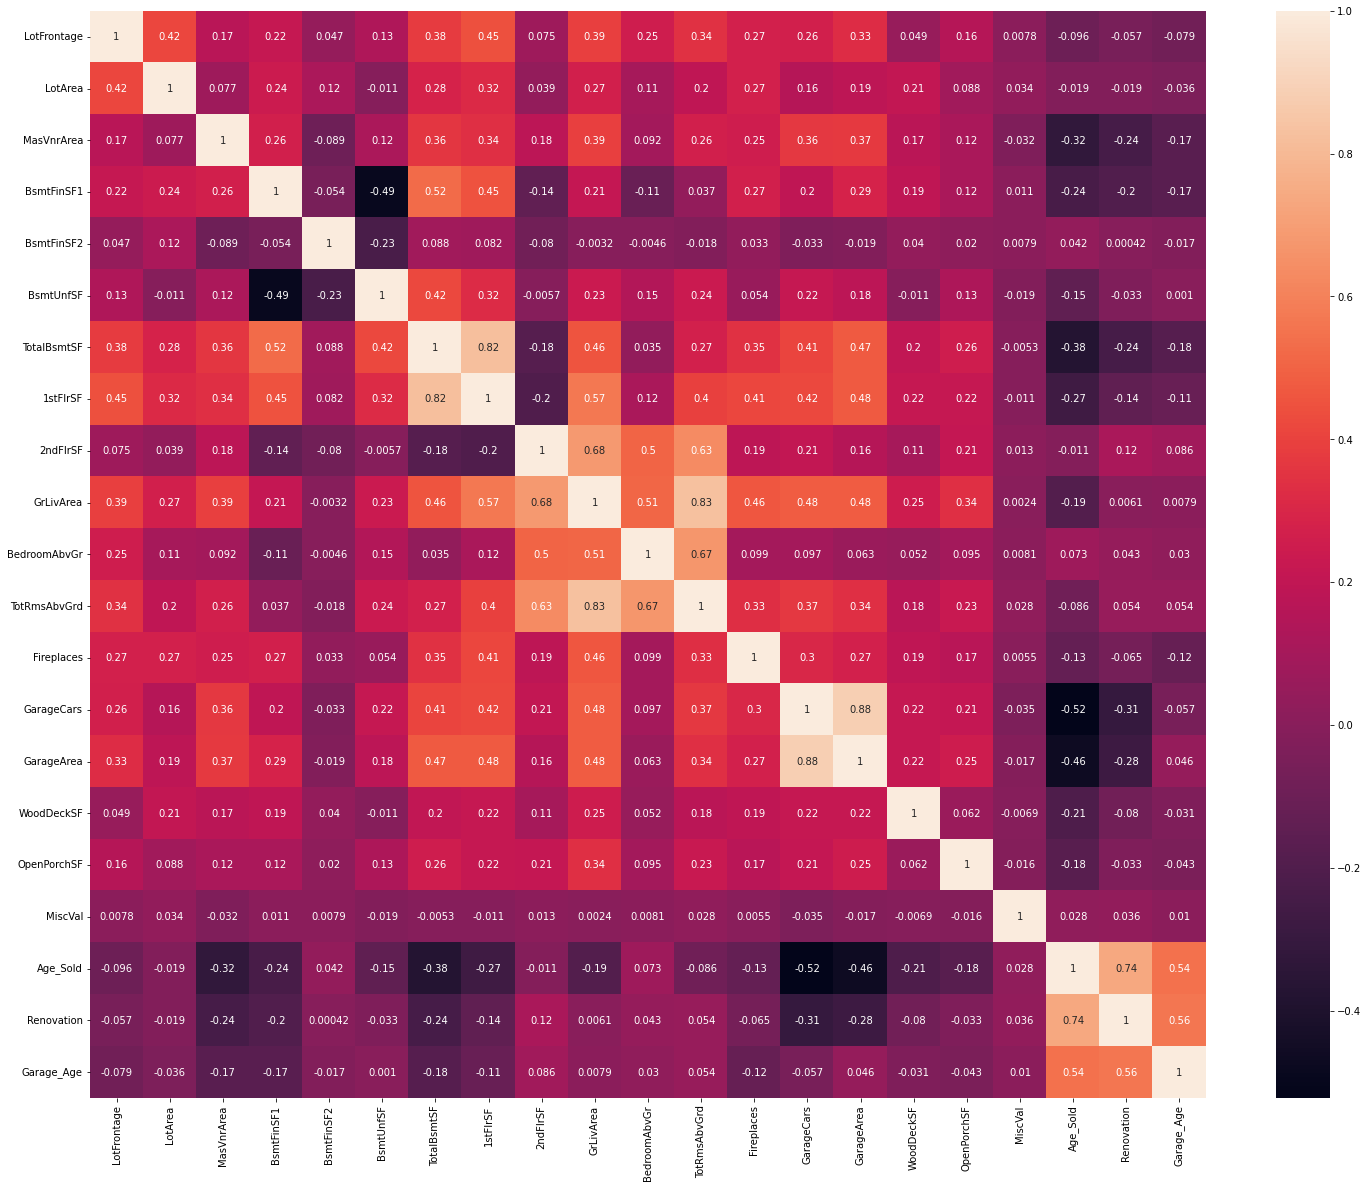

In [113]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(X_num.corr(), annot=True)
plt.show;

In [114]:
corr = X_num.corr()
corr_values = corr.unstack()
corr_values = corr_values.loc[corr_values != 1]
corr_values.sort_values(ascending=False).head(10)

GarageArea    GarageCars      0.881687
GarageCars    GarageArea      0.881687
TotRmsAbvGrd  GrLivArea       0.828413
GrLivArea     TotRmsAbvGrd    0.828413
TotalBsmtSF   1stFlrSF        0.822746
1stFlrSF      TotalBsmtSF     0.822746
Age_Sold      Renovation      0.737776
Renovation    Age_Sold        0.737776
GrLivArea     2ndFlrSF        0.684751
2ndFlrSF      GrLivArea       0.684751
dtype: float64

In [115]:
def collinearity_selector(X, n):
    
    if type(X) == pd.core.frame.DataFrame:
      X_n = X.copy()

    if type(X) == np.ndarray:
      X_n = pd.DataFrame(X, columns=X_num.columns)
    
    corr_matrix = X_n.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > n)]
    
    return X_n.drop(to_drop, axis=1)

In [116]:
# any columns which correlate with coefficients above 0.8 is removed.
drop_cols = list(set(X_num.columns) - set(collinearity_selector(X_num, 0.8).columns))
drop_cols

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [117]:
# apply collinearity to remove highly correlated features in X_num.
X_num = collinearity_selector(X_num, 0.8)
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   966 non-null    float64
 1   LotArea       1168 non-null   int64  
 2   MasVnrArea    1162 non-null   float64
 3   BsmtFinSF1    1168 non-null   int64  
 4   BsmtFinSF2    1168 non-null   int64  
 5   BsmtUnfSF     1168 non-null   int64  
 6   TotalBsmtSF   1168 non-null   int64  
 7   2ndFlrSF      1168 non-null   int64  
 8   GrLivArea     1168 non-null   int64  
 9   BedroomAbvGr  1168 non-null   int64  
 10  Fireplaces    1168 non-null   int64  
 11  GarageCars    1168 non-null   int64  
 12  WoodDeckSF    1168 non-null   int64  
 13  OpenPorchSF   1168 non-null   int64  
 14  MiscVal       1168 non-null   int64  
 15  Age_Sold      1168 non-null   float64
 16  Renovation    1168 non-null   float64
 17  Garage_Age    1103 non-null   float64
dtypes: float64(5), int64(13)
m

In [118]:
# remove highly collinear  features from test set.
X_test.drop(drop_cols, axis=1, inplace=True)

In [119]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   966 non-null    float64
 1   LotArea       1168 non-null   int64  
 2   MasVnrArea    1162 non-null   float64
 3   BsmtFinSF1    1168 non-null   int64  
 4   BsmtFinSF2    1168 non-null   int64  
 5   BsmtUnfSF     1168 non-null   int64  
 6   TotalBsmtSF   1168 non-null   int64  
 7   2ndFlrSF      1168 non-null   int64  
 8   GrLivArea     1168 non-null   int64  
 9   BedroomAbvGr  1168 non-null   int64  
 10  Fireplaces    1168 non-null   int64  
 11  GarageCars    1168 non-null   int64  
 12  WoodDeckSF    1168 non-null   int64  
 13  OpenPorchSF   1168 non-null   int64  
 14  MiscVal       1168 non-null   int64  
 15  Age_Sold      1168 non-null   float64
 16  Renovation    1168 non-null   float64
 17  Garage_Age    1103 non-null   float64
dtypes: float64(5), int64(13)
m

###### **Correlation Plot**

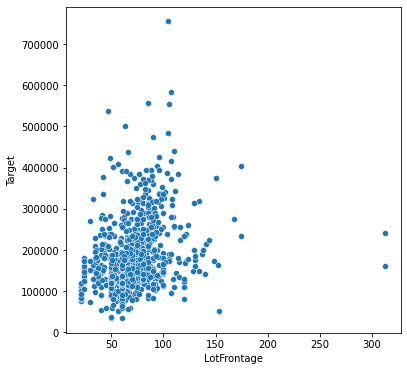

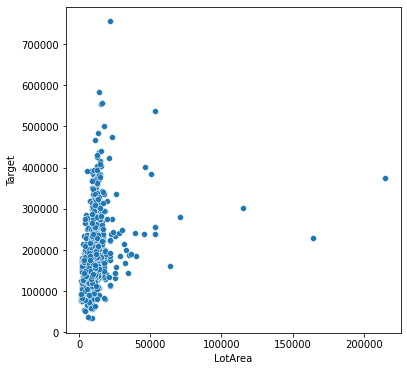

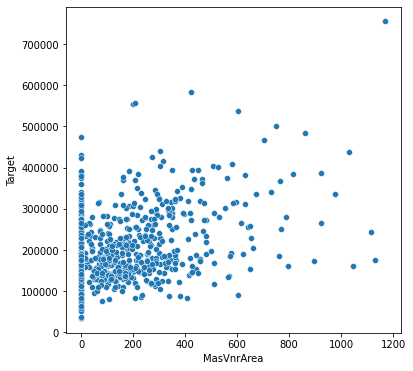

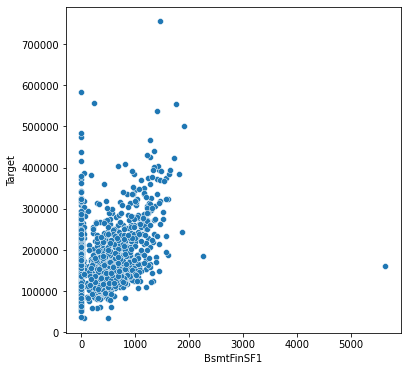

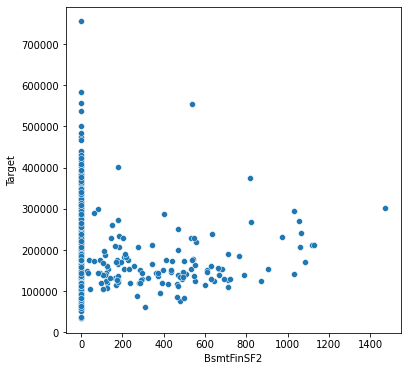

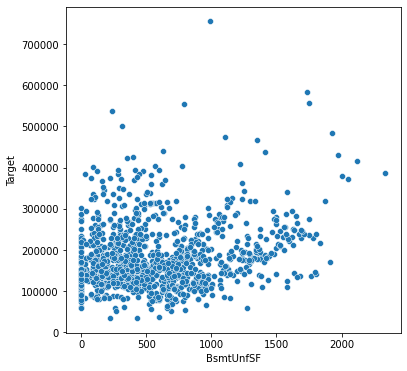

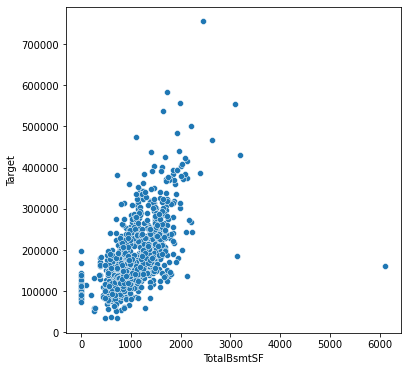

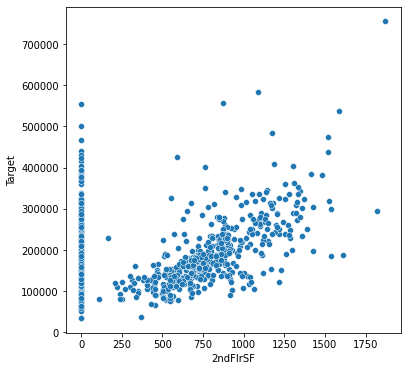

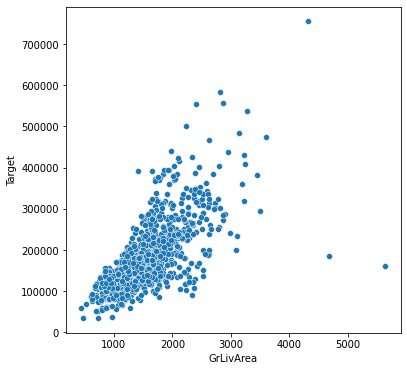

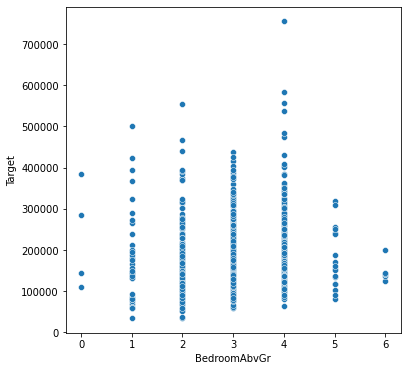

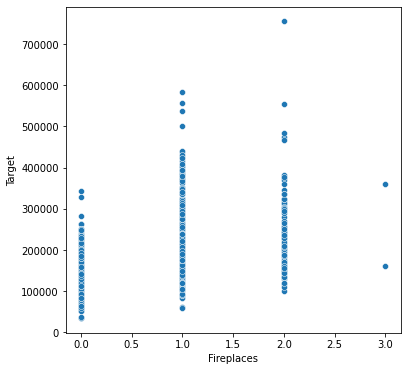

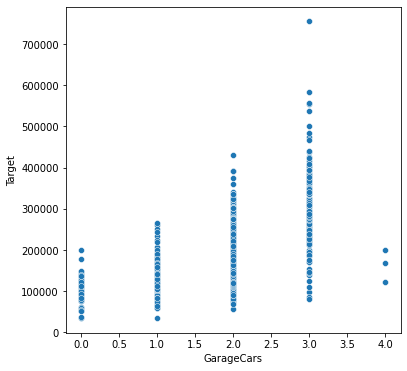

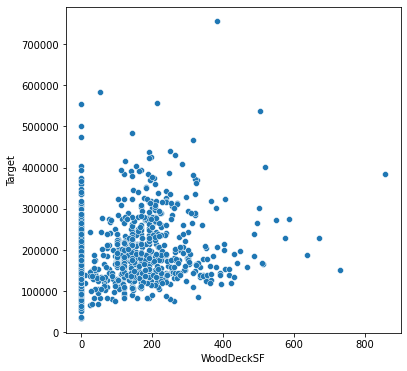

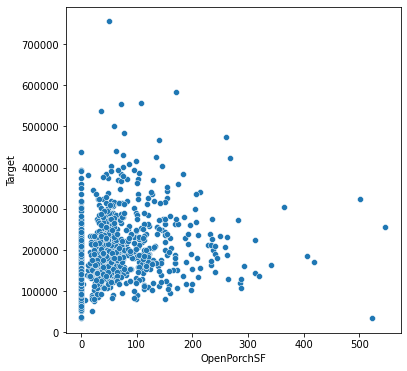

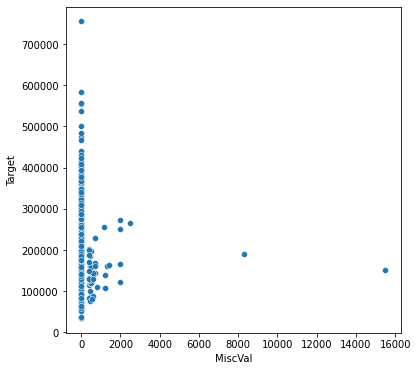

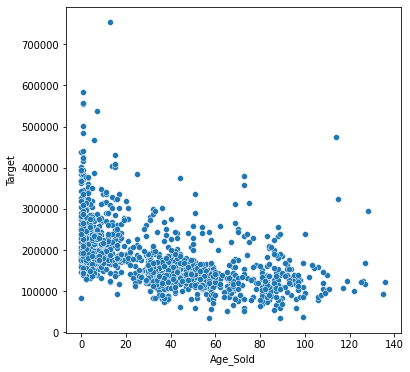

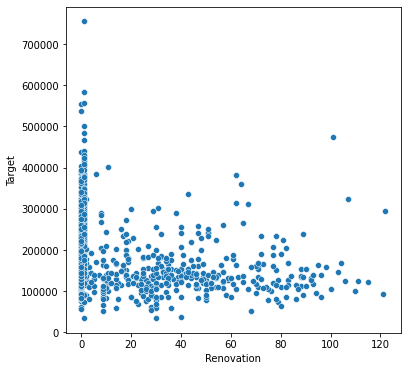

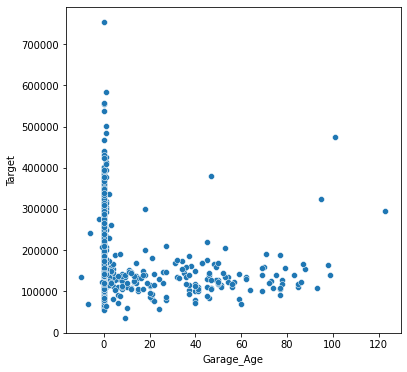

In [120]:
for elem in X_num.columns.tolist():

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=X_num.loc[:, f'{elem}'], y=y)
    plt.xlabel(f'{elem}')
    plt.ylabel('Target')
    plt.show();

#####**Categorical Features**

######**Ordinal Features**

In [121]:
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1103 non-null   object
 1   GarageFinish  1103 non-null   object
 2   GarageQual    1103 non-null   object
 3   Electrical    1168 non-null   object
 4   HeatingQC     1168 non-null   object
 5   BsmtFinType2  1139 non-null   object
 6   BsmtFinType1  1139 non-null   object
 7   BsmtExposure  1139 non-null   object
 8   KitchenQual   1168 non-null   object
 9   BsmtQual      1139 non-null   object
 10  BsmtCond      1139 non-null   object
 11  ExterCond     1168 non-null   object
 12  ExterQual     1168 non-null   object
 13  Functional    1168 non-null   object
 14  OverallQual   1168 non-null   object
 15  OverallCond   1168 non-null   object
 16  Street        1168 non-null   object
 17  LotShape      1168 non-null   object
 18  LandContour   1168 non-null   object
 19  Util

In [122]:
# use the variance selector developed by me for feature selection.
def cat_varselector(X, n):

  drop_col = list()

  for elem in X.columns.tolist():
    df = X[f'{elem}'].value_counts().reset_index()
    df = df.assign(percent = df[f'{elem}']/sum(df[f'{elem}']))
    df = df.assign(SQR = (df.percent)**2)
    
    if df.SQR.sum() > n:
      drop_col.append(elem)

  return drop_col

In [123]:
# ordinal drop columns.
drop_col = cat_varselector(X_cat_ord, 0.85)
drop_col

['GarageCond',
 'GarageQual',
 'Functional',
 'Street',
 'Utilities',
 'LandSlope',
 'PavedDrive']

In [124]:
# apply the variance selector to ordinal features.
X_cat_ord.drop(drop_col, axis=1, inplace=True)

# apply to test set.
X_test.drop(drop_col, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [125]:
X_cat_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageFinish  1103 non-null   object
 1   Electrical    1168 non-null   object
 2   HeatingQC     1168 non-null   object
 3   BsmtFinType2  1139 non-null   object
 4   BsmtFinType1  1139 non-null   object
 5   BsmtExposure  1139 non-null   object
 6   KitchenQual   1168 non-null   object
 7   BsmtQual      1139 non-null   object
 8   BsmtCond      1139 non-null   object
 9   ExterCond     1168 non-null   object
 10  ExterQual     1168 non-null   object
 11  OverallQual   1168 non-null   object
 12  OverallCond   1168 non-null   object
 13  LotShape      1168 non-null   object
 14  LandContour   1168 non-null   object
 15  LotConfig     1168 non-null   object
dtypes: object(16)
memory usage: 187.4+ KB


In [126]:
X_cat_ord.columns

Index(['GarageFinish', 'Electrical', 'HeatingQC', 'BsmtFinType2',
       'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond',
       'ExterCond', 'ExterQual', 'OverallQual', 'OverallCond', 'LotShape',
       'LandContour', 'LotConfig'],
      dtype='object')

In [127]:
# build pipeline to check ordinal features.
categ_a = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
categ_b = ['N_A', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
categ_c = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_d = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_e = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_f = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
categ_g = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_h = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_i = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_j = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_k = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_l = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_m = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_n = ['IR3', 'IR2', 'IR1', 'Reg']
categ_o = ['Low', 'HLS', 'Bnk', 'Lvl']
categ_p = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']


cat_ord_categ = [categ_a, categ_b, categ_c, categ_d, categ_e, categ_f, categ_g, categ_h, \
                 categ_i, categ_j, categ_k, categ_l, categ_m, categ_n, categ_o, categ_p]

cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"), \
                                     OrdinalEncoder(categories=cat_ord_categ))
     

preprocessor = ColumnTransformer(transformers=[('cat_ord', cat_ordinal_pipeline, X_cat_ord.columns)])


model = KNeighborsRegressor()

fullpipeline = make_pipeline(preprocessor, model)
fullpipeline.fit(X_cat_ord, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_ord',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N_A',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['N_A',
                                                                                               'NA',
                                                                                               'Unf',
                                                                                               'RFn',
                                                                                               'Fin'],
                                                                                              ['N_A',
                                                                                               'Mix',
                                                                                               'FuseP',
                                                                                               'FuseF',
                                                                                               'FuseA',
                                                                                               'SBrkr'],
                                                                                              ['Po',
                                                                                               'Fa',
                                                                                               'TA',
                                                                                               'Gd',
                                                                                               'Ex'],
                                                                                              ['N_A',
                                                                                               'NA',
                                                                                               'Unf',
                                                                                               'LwQ',
                                                                                               'Rec',
                                                                                               'BLQ'...
                                                                                               'HLS',
                                                                                               'Bnk',
                                                                                               'Lvl'],
                                                                                              ['Inside',
                                                                                               'Corner',
                                                                                               'CulDSac',
                                                                                               'FR2',
                                                                                               'FR3']]))]),
                                                  Index(['GarageFinish', 'Electrical', 'HeatingQC', 'BsmtFinType2',
       'BsmtFinType1', 'BsmtExposure', 'KitchenQual', 'BsmtQual', 'BsmtCond',
       'ExterCond', 'ExterQual', 'OverallQual', 'OverallCond', 'LotShape',
       'LandContour', 'LotConfig'],
      dtype='object'))])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [128]:
fullpipeline.predict(X_cat_ord)

array([171540. , 270900. , 206635.6, ..., 262040. , 259015.4, 146260. ])

In [129]:
fullpipeline.predict(X_test[X_cat_ord.columns.tolist()])

array([345796. , 303924.8, 174800. , 240146. , 136300. , 229600. ,
       240000. , 205250. , 177728. , 173398. , 335960.4, 185000. ,
       238798. , 201780. , 316875.6, 208380. , 140400. , 129000. ,
       143400. , 167428. , 133200. , 394530.2, 201960. , 179880. ,
       126760. ,  98480. , 142500. , 311089.4, 270600. , 117700. ,
       142100. , 185717. , 179605.8, 327300. , 179880. , 177147.4,
       183860. , 183400. , 105400. , 135880. , 214419.2, 180080. ,
       239500. , 145580. , 173770. , 198607. , 136300. , 201850. ,
       112002.2, 160780. , 210400. , 101598.6, 154500. , 157920. ,
       198607. , 127520. , 206519.8, 123550. , 171608. , 159870. ,
       136015.8, 116080. , 103076.6, 191100. , 167428. , 141500. ,
       167260. , 262040. , 183400. , 126085. , 125140. , 223980. ,
       240400. , 229600. , 234820. , 138700. , 109010. , 123400. ,
       109850. , 391354.6, 166680. , 107600. , 146830. , 125000. ,
       173200. , 192500. , 186405.4, 114060. , 350088.4, 10680

    This shows that everything is okay with the ordinal categorical data, next I turn to the nominal categorical data

######**Nominal Features**

In [130]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Neighborhood   1168 non-null   object
 2   Condition1     1168 non-null   object
 3   Condition2     1168 non-null   object
 4   BldgType       1168 non-null   object
 5   HouseStyle     1168 non-null   object
 6   RoofStyle      1168 non-null   object
 7   RoofMatl       1168 non-null   object
 8   Exterior1st    1168 non-null   object
 9   Exterior2nd    1168 non-null   object
 10  MasVnrType     1162 non-null   object
 11  Foundation     1168 non-null   object
 12  Heating        1168 non-null   object
 13  CentralAir     1168 non-null   object
 14  GarageType     1103 non-null   object
 15  SaleType       1168 non-null   object
 16  SaleCondition  1168 non-null   object
 17  MSSubClass     1168 non-null   object
 18  MoSold         1168 non-nu

In [131]:
# use the variance selector developed by me for feature selection.
def cat_varselector(X, n):

  drop_col = list()

  for elem in X.columns.tolist():
    df = X[f'{elem}'].value_counts().reset_index()
    df = df.assign(percent = df[f'{elem}']/sum(df[f'{elem}']))
    df = df.assign(SQR = (df.percent)**2)
    
    if df.SQR.sum() > n:
      drop_col.append(elem)

  return drop_col

In [132]:
# ordinal drop columns.
drop_col = cat_varselector(X_cat_onehot, 0.75)
drop_col

['Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'SaleType']

In [133]:
X_cat_onehot[drop_col]

,Condition2,RoofMatl,Heating,CentralAir,SaleType
Id,,,,,
956,Norm,CompShg,GasA,N,WD
1279,Norm,CompShg,GasA,Y,WD
668,Norm,CompShg,GasA,Y,WD
544,Norm,CompShg,GasA,Y,WD
1036,Norm,CompShg,GasA,N,WD
...,...,...,...,...,...
1342,Norm,CompShg,GasA,Y,WD
144,Norm,CompShg,GasA,Y,WD
475,Norm,CompShg,GasA,Y,WD


In [134]:
for elem in X_cat_onehot[drop_col].columns.tolist():
  print(X_cat_onehot[drop_col][f'{elem}'].value_counts())
  print('\n')

Norm      1155
Feedr        4
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


CompShg    1146
Tar&Grv      11
WdShake       4
WdShngl       4
Membran       1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64


GasA     1140
GasW       15
Grav        7
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


Y    1088
N      80
Name: CentralAir, dtype: int64


WD       1019
New        95
COD        31
ConLD       8
ConLw       5
ConLI       3
Oth         3
CWD         2
Con         2
Name: SaleType, dtype: int64




In [135]:
# apply the variance selector to ordinal features.
X_cat_onehot.drop(drop_col, axis=1, inplace=True)

# apply to test set.
X_test.drop(drop_col, axis=1, inplace=True)

In [136]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Neighborhood   1168 non-null   object
 2   Condition1     1168 non-null   object
 3   BldgType       1168 non-null   object
 4   HouseStyle     1168 non-null   object
 5   RoofStyle      1168 non-null   object
 6   Exterior1st    1168 non-null   object
 7   Exterior2nd    1168 non-null   object
 8   MasVnrType     1162 non-null   object
 9   Foundation     1168 non-null   object
 10  GarageType     1103 non-null   object
 11  SaleCondition  1168 non-null   object
 12  MSSubClass     1168 non-null   object
 13  MoSold         1168 non-null   object
dtypes: object(14)
memory usage: 169.2+ KB


In [137]:
# build pipeline to check the goodness of the prepared data set.
cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore")
                                   )
        

preprocessor = ColumnTransformer(transformers=[('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns)])

param = {#'columntransformer__num_pipe1__simpleimputer__strategy': ['mean', 'median'],
         'kneighborsregressor__n_neighbors': range(5, 20),
         'kneighborsregressor__weights': ['uniform', 'distance'],
         'kneighborsregressor__leaf_size': range(2, 4),
         'kneighborsregressor__p': [2]
        }

model = KNeighborsRegressor()

fullpipeline = make_pipeline(preprocessor, model)

search = GridSearchCV(fullpipeline, param, cv=5, verbose=1)
search.fit(X_cat_onehot, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories i

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat_onehot',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['MSZoning', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle'...or2nd', 'MasVnrType', 'Foundation',
       'GarageType', 'SaleCondition', 'MSSubClass', 'MoSold'],
      dtype='object'))])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__leaf_size': range(2, 4),
                         'kneighborsregressor__n_neighbors': range(5, 20),
                         'kneighborsregressor__p': [2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             verbose=1)

In [138]:
search.predict(X_cat_onehot)

array([176850.  , 225662.5 , 147106.25, ..., 224487.5 , 294825.  ,
       174400.  ])

In [139]:
# check the prediction for unknown categories.
search.predict(X_test[X_cat_onehot.columns.tolist()])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2, 7] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


array([292612.5  , 242797.125, 190125.   , 221006.625, 186506.25 ,
       183500.   , 210687.5  , 206403.75 , 211880.25 , 195156.375,
       402200.25 , 165887.5  , 255800.   , 220080.375, 251168.75 ,
       152243.75 , 150093.75 , 126697.   , 140112.5  , 233850.   ,
       159425.   , 396402.375, 201287.5  , 216673.125, 133312.5  ,
       129687.5  , 166562.5  , 352393.75 , 221311.875,  96475.   ,
       156325.   , 204300.   , 124437.5  , 311380.625, 188550.   ,
       136125.   , 207737.5  , 155805.   , 116687.5  , 146646.875,
       194148.875, 188550.   , 282785.   , 128550.   , 167975.   ,
       238487.5  , 133300.   , 143650.   , 146862.5  , 187037.5  ,
       213871.25 , 157937.5  , 122600.   , 173331.25 , 212862.5  ,
       135612.5  , 192904.625, 128362.5  , 193012.5  , 128500.   ,
       114987.5  , 160112.5  , 107350.   , 156737.5  , 240091.   ,
       201062.5  , 181787.5  , 276600.   , 155805.   , 128987.5  ,
       123700.   , 377593.75 , 190468.75 , 200312.5  , 220080.

    Unknown category found in columns 2, 5, 6 & 7. We must adjust the test set slightly to eliminate this.

In [140]:
X_cat_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1168 non-null   object
 1   Neighborhood   1168 non-null   object
 2   Condition1     1168 non-null   object
 3   BldgType       1168 non-null   object
 4   HouseStyle     1168 non-null   object
 5   RoofStyle      1168 non-null   object
 6   Exterior1st    1168 non-null   object
 7   Exterior2nd    1168 non-null   object
 8   MasVnrType     1162 non-null   object
 9   Foundation     1168 non-null   object
 10  GarageType     1103 non-null   object
 11  SaleCondition  1168 non-null   object
 12  MSSubClass     1168 non-null   object
 13  MoSold         1168 non-null   object
dtypes: object(14)
memory usage: 169.2+ KB


In [141]:
X_cat_onehot.RoofStyle.value_counts()

Gable      915
Hip        226
Flat        11
Gambrel      9
Mansard      6
Shed         1
Name: RoofStyle, dtype: int64

In [142]:
# check and eliminate unknown categories in test set
X_test.RoofStyle.value_counts()

Gable      226
Hip         60
Flat         2
Gambrel      2
Mansard      1
Shed         1
Name: RoofStyle, dtype: int64

In [143]:
X_cat_onehot[X_cat_onehot.RoofStyle == 'Shed']

,MSZoning,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleCondition,MSSubClass,MoSold
Id,,,,,,,,,,,,,,
1231,RL,Sawyer,Feedr,Duplex,1.5Fin,Shed,Plywood,Plywood,None,CBlock,BuiltIn,Normal,90,8


In [144]:
# check and eliminate unknown categories in test set
X_test[X_test.RoofStyle == 'Shed']

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BedroomAbvGr,...,GarageType,GarageFinish,SaleCondition,MSSubClass,MoSold,OverallQual,OverallCond,Age_Sold,Renovation,Garage_Age
Id,,,,,,,,,,,,,,,,,,,,,
1271,NaN,23595,0.0,1258,0,74,1332,192,1524,0,...,Attchd,Fin,Normal,40,4,7,6,31,0,0.0


In [145]:
# # check and eliminate unknown categories in the train and test set
X_cat_onehot.loc[1231, 'RoofStyle'] = 'Mansard'
X_cat_onehot.loc[1012, 'Exterior1st'] = 'BrkComm'
X_cat_onehot.loc[1188, 'Exterior1st'] = 'BrkComm'
X_cat_onehot.loc[1371, 'Exterior1st'] = 'Stone'
X_cat_onehot.loc[1371, 'Exterior2nd'] = 'Stone'

X_test.loc[1271, 'RoofStyle'] = 'Mansard'
X_test.loc[596, 'Exterior2nd'] = 'Brk Cmn'
X_test.loc[470, 'Condition1'] = 'RRNn'
X_test.loc[238, 'Condition1'] = 'RRNn'

In [147]:
# build pipeline to recheck the goodness of the prepared data set.
cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore")
                                   )
        

preprocessor = ColumnTransformer(transformers=[('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns)])

param = {#'columntransformer__num_pipe1__simpleimputer__strategy': ['mean', 'median'],
         'kneighborsregressor__n_neighbors': range(5, 20),
         'kneighborsregressor__weights': ['uniform', 'distance'],
         'kneighborsregressor__leaf_size': range(2, 4),
         'kneighborsregressor__p': [2]
        }

model = KNeighborsRegressor()

fullpipeline = make_pipeline(preprocessor, model)

search = GridSearchCV(fullpipeline, param, cv=5, verbose=1)
search.fit(X_cat_onehot, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat_onehot',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='N_A',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         Index(['MSZoning', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle'...or2nd', 'MasVnrType', 'Foundation',
       'GarageType', 'SaleCondition', 'MSSubClass', 'MoSold'],
      dtype='object'))])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__leaf_size': range(2, 4),
                         'kneighborsregressor__n_neighbors': range(5, 20),
                         'kneighborsregressor__p': [2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             verbose=1)

In [148]:
search.predict(X_cat_onehot)

array([176850.  , 225662.5 , 147106.25, ..., 224487.5 , 294825.  ,
       174400.  ])

In [149]:
# check the prediction for unknown categories.
search.predict(X_test[X_cat_onehot.columns.tolist()])

array([292612.5  , 242797.125, 190125.   , 221006.625, 186506.25 ,
       183500.   , 210687.5  , 206403.75 , 211880.25 , 195156.375,
       402200.25 , 165887.5  , 255800.   , 220080.375, 251168.75 ,
       152243.75 , 163968.75 , 126697.   , 140112.5  , 233850.   ,
       159425.   , 396402.375, 201287.5  , 216673.125, 133312.5  ,
       129687.5  , 166562.5  , 352393.75 , 221311.875,  96475.   ,
       156325.   , 204300.   , 124437.5  , 311380.625, 188550.   ,
       136125.   , 207737.5  , 155805.   , 116687.5  , 146646.875,
       194148.875, 188550.   , 282785.   , 128550.   , 167975.   ,
       238487.5  , 133300.   , 143650.   , 146862.5  , 187037.5  ,
       213871.25 , 157937.5  , 122600.   , 173331.25 , 212862.5  ,
       135612.5  , 192904.625, 128362.5  , 193012.5  , 128500.   ,
       114987.5  , 160112.5  , 107350.   , 156737.5  , 240091.   ,
       201062.5  , 181787.5  , 276600.   , 155805.   , 128987.5  ,
       123700.   , 377593.75 , 190375.   , 200312.5  , 220080.

    Now everything is fine with the nominal features since no more unknown categories. Now to develop the full pipeline and model without scaling.

In [150]:
# Join all the train set parts.
X_train = pd.concat([X_num, X_cat_ord, X_cat_onehot], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 956 to 1157
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    966 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   MasVnrArea     1162 non-null   float64
 3   BsmtFinSF1     1168 non-null   int64  
 4   BsmtFinSF2     1168 non-null   int64  
 5   BsmtUnfSF      1168 non-null   int64  
 6   TotalBsmtSF    1168 non-null   int64  
 7   2ndFlrSF       1168 non-null   int64  
 8   GrLivArea      1168 non-null   int64  
 9   BedroomAbvGr   1168 non-null   int64  
 10  Fireplaces     1168 non-null   int64  
 11  GarageCars     1168 non-null   int64  
 12  WoodDeckSF     1168 non-null   int64  
 13  OpenPorchSF    1168 non-null   int64  
 14  MiscVal        1168 non-null   int64  
 15  Age_Sold       1168 non-null   float64
 16  Renovation     1168 non-null   float64
 17  Garage_Age     1103 non-null   float64
 18  Garage

#### **Build Pipeline and Model**

In [151]:
# define a function to transform a column based on observation.
def col_trans(X_col):

  # create copy of input series
  X_col_copy = X_col.copy().squeeze()
  
  # missing value filler.
  filler = int(np.round(np.median([x for x in X_col_copy if (x != 0) & (x == x)])))

  # fill in the missing values
  for idx in list(X_col_copy[X_col_copy.isna()].index):
      X_col_copy.loc[idx] = filler

  return X_col_copy.to_frame(name='MasVnrArea')

In [179]:
# make numerical features pipeline.
col1 = X_num.columns.tolist()
col1.remove('MasVnrArea')

col2 = ['MasVnrArea']


numeric_pipeline1 = make_pipeline(SimpleImputer())
numeric_pipeline2 = make_pipeline(FunctionTransformer(func=col_trans, validate=False))

# make ordinal features pipeline.
categ_a = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
categ_b = ['N_A', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
categ_c = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_d = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_e = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_f = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
categ_g = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_h = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_i = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_j = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_k = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_l = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_m = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_n = ['IR3', 'IR2', 'IR1', 'Reg']
categ_o = ['Low', 'HLS', 'Bnk', 'Lvl']
categ_p = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']


cat_ord_categ = [categ_a, categ_b, categ_c, categ_d, categ_e, categ_f, categ_g, categ_h, \
                 categ_i, categ_j, categ_k, categ_l, categ_m, categ_n, categ_o, categ_p]

cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"), \
                                     OrdinalEncoder(categories=cat_ord_categ))


# make nominal features pipeline.
cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore")
                                   )


preprocessor = ColumnTransformer(transformers=[('num_pipe1', numeric_pipeline1, col1),
                                               ('num_pipe2', numeric_pipeline2, col2),
                                               ('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns),
                                               ('cat_ord', cat_ordinal_pipeline, X_cat_ord.columns)
                                              ]
                                )

param = {'columntransformer__num_pipe1__simpleimputer__strategy': ['mean', 'median'],
         'kneighborsregressor__n_neighbors': range(7, 15),
         'kneighborsregressor__weights': ['uniform', 'distance'],
         'kneighborsregressor__algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute'],
         'kneighborsregressor__leaf_size': range(2, 6),
         'kneighborsregressor__p': [2]
        }


fullpipeline = make_pipeline(preprocessor, KNeighborsRegressor())

search = GridSearchCV(fullpipeline, param, cv=5, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         ['LotFrontage',
                                                                          'LotArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '2ndFlrSF',
                                                                          'GrLivArea',
                                                                          'BedroomAbvGr',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'MiscVal',
                                                                          'Age_Sold'...
                                        KNeighborsRegressor())]),
             param_grid={'columntransformer__num_pipe1__simpleimputer__strategy': ['mean',
                                                                                   'median'],
                         'kneighborsregressor__algorithm': ['auto', 'kd_tree',
                                                            'ball_tree',
                                                            'brute'],
                         'kneighborsregressor__leaf_size': range(2, 6),
                         'kneighborsregressor__n_neighbors': range(7, 15),
                         'kneighborsregressor__p': [2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             verbose=1)

In [180]:
search.predict(X_train)

array([145000., 237000., 193500., ..., 251000., 260000., 179900.])

In [181]:
search.best_params_

{'columntransformer__num_pipe1__simpleimputer__strategy': 'mean',
 'kneighborsregressor__algorithm': 'kd_tree',
 'kneighborsregressor__leaf_size': 2,
 'kneighborsregressor__n_neighbors': 7,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'distance'}

In [182]:
search.best_score_

0.6307698887441976

In [183]:
r2_score(y_train, search.predict(X_train))

1.0

In [184]:
r2_score(y_test, search.predict(X_test))

0.6218257153964375

    The drop in accuracy on test set show some extra things can be done to improve the accuracy.

In [185]:
# make numerical features pipeline.
col1 = X_num.columns.tolist()
col1.remove('MasVnrArea')

col2 = ['MasVnrArea']


numeric_pipeline1 = make_pipeline(SimpleImputer())
numeric_pipeline2 = make_pipeline(FunctionTransformer(func=col_trans, validate=False))

preprocessor1 = ColumnTransformer(transformers=[('num_pipe1', numeric_pipeline1, col1),
                                               ('num_pipe2', numeric_pipeline2, col2),
                                              ]
                                 )

full_numeric_pipeline = make_pipeline(preprocessor1,
                                      RobustScaler()
                                     )


# make ordinal features pipeline.
categ_a = ['N_A', 'NA', 'Unf', 'RFn', 'Fin']
categ_b = ['N_A', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
categ_c = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_d = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_e = ['N_A', 'NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
categ_f = ['N_A', 'NA', 'No', 'Mn', 'Av', 'Gd']
categ_g = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_h = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_i = ['N_A', 'NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_j = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_k = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
categ_l = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_m = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
categ_n = ['IR3', 'IR2', 'IR1', 'Reg']
categ_o = ['Low', 'HLS', 'Bnk', 'Lvl']
categ_p = ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']


cat_ord_categ = [categ_a, categ_b, categ_c, categ_d, categ_e, categ_f, categ_g, categ_h, \
                 categ_i, categ_j, categ_k, categ_l, categ_m, categ_n, categ_o, categ_p]

cat_ordinal_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"), \
                                     OrdinalEncoder(categories=cat_ord_categ))
     

cat_onehot_pipeline = make_pipeline(SimpleImputer(strategy="constant", fill_value="N_A"),\
                                    OneHotEncoder(drop='first', handle_unknown="ignore")
                                    )
         
        

preprocessor = ColumnTransformer(transformers=[('num_pipe', full_numeric_pipeline, X_num.columns),
                                               ('cat_onehot', cat_onehot_pipeline, X_cat_onehot.columns),
                                               ('cat_ord', cat_ordinal_pipeline, X_cat_ord.columns)
                                              ]
                                )
        

columntransformer_param = {'columntransformer__num_pipe__columntransformer__num_pipe1__simpleimputer__strategy': ['mean', 'median'],
                          #  'columntransformer__num_pipe__selectkbest__k': range(16, 19),
                          #  'columntransformer__num_pipe__pca__n_components': range(14, 17)
                          }

param = {**columntransformer_param,
         'kneighborsregressor__n_neighbors': range(7, 15),
         'kneighborsregressor__weights': ['uniform', 'distance'],
         'kneighborsregressor__algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute'],
         'kneighborsregressor__leaf_size': range(2, 6),
         'kneighborsregressor__p': [2]
        }

fullpipeline1 = make_pipeline(preprocessor, KNeighborsRegressor())

search = GridSearchCV(fullpipeline1, param, cv=5, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('columntransformer',
                                                                                          ColumnTransformer(transformers=[('num_pipe1',
                                                                                                                           Pipeline(steps=[('simpleimputer',
                                                                                                                                            SimpleImputer())]),
                                                                                                                           ['LotFrontage',
                                                                                                                            'LotArea',
                                                                                                                            'BsmtFinSF1',
                                                                                                                            'BsmtFinSF2',
                                                                                                                            'BsmtUnfSF',
                                                                                                                            'TotalBsmtSF',
                                                                                                                            '2ndFlrSF',
                                                                                                                            'GrLivArea',
                                                                                                                            'Bedroo...
             param_grid={'columntransformer__num_pipe__columntransformer__num_pipe1__simpleimputer__strategy': ['mean',
                                                                                                                'median'],
                         'kneighborsregressor__algorithm': ['auto', 'kd_tree',
                                                            'ball_tree',
                                                            'brute'],
                         'kneighborsregressor__leaf_size': range(2, 6),
                         'kneighborsregressor__n_neighbors': range(7, 15),
                         'kneighborsregressor__p': [2],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance']},
             verbose=1)

In [186]:
search.predict(X_train)

array([145000., 237000., 193500., ..., 251000., 260000., 179900.])

In [187]:
search.best_params_

{'columntransformer__num_pipe__columntransformer__num_pipe1__simpleimputer__strategy': 'median',
 'kneighborsregressor__algorithm': 'kd_tree',
 'kneighborsregressor__leaf_size': 2,
 'kneighborsregressor__n_neighbors': 8,
 'kneighborsregressor__p': 2,
 'kneighborsregressor__weights': 'distance'}

In [188]:
search.best_score_

0.6805887024888764

In [189]:
r2_score(y_train, search.predict(X_train))

1.0

In [190]:
r2_score(y_test, search.predict(X_test))

0.7552653081852306